In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
from deepagri.data_full import get_df_full

In [20]:
df=get_df_full(agg_type='M')

/Users/constantintalandier/code/Constantier/deepagri/deepagri/meteo_agg.py:99: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  df_agg.loc[:, idx[:,cols_to_shift]] = (df_agg.loc[:, idx[:,cols_to_shift]]
/Users/constantintalandier/code/Constantier/deepagri/deepagri/meteo_agg.py:99: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  df_agg.loc[:, idx[:,cols_to_shift]] = (df_agg.loc[:, idx[:,cols_to_shift]]


In [21]:
df

,Agriculteur,Production,RatioSep,RatioOct,Prix_matos,tmax_c 01,tmax_c 02,tmax_c 03,tmax_c 04,tmax_c 05,...,uv_idx 12_n-1,sunhour 01,sunhour 02,sunhour 03,sunhour 04,sunhour 05,sunhour 09_n-1,sunhour 10_n-1,sunhour 11_n-1,sunhour 12_n-1
2010-1,2820.041792,239640.3,1.229426,1.255319,92.741667,7.0,5.0,7.0,5.0,5.0,...,1.645161,5.803226,7.564286,9.532258,12.416667,12.158065,11.066667,8.932258,6.893333,6.077419
2010-2,3563.698886,1485134.7,1.229426,1.255319,92.741667,4.0,6.0,7.0,6.0,5.0,...,1.903226,6.116129,6.335714,9.467742,12.096667,12.693548,10.553333,7.745161,5.053333,5.029032
2010-3,4276.654443,307450.0,1.229426,1.255319,92.741667,6.0,5.0,9.0,4.0,3.0,...,1.774194,5.964516,7.667857,9.741935,11.956667,12.332258,10.506667,9.261290,6.766667,5.348387
2010-4,1462.803043,6233.7,1.229426,1.255319,92.741667,3.0,6.0,6.0,8.0,8.0,...,1.838710,7.290323,8.550000,10.506452,12.880000,13.706452,11.273333,9.293548,8.183333,7.467742
2010-5,1406.337173,9753.9,1.229426,1.255319,92.741667,3.0,5.0,4.0,6.0,7.0,...,1.483871,6.370968,7.753571,9.777419,12.413333,13.283871,10.996667,9.490323,7.516667,7.409677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-91,422.282609,243243.0,1.104197,1.072703,89.891667,6.0,4.0,4.0,4.0,7.0,...,2.129032,4.958065,7.510714,9.254839,11.213333,11.777419,9.846667,6.312903,7.233333,4.364516
2021-93,80.734902,2739.0,1.104197,1.072703,89.891667,14.0,6.0,8.0,14.0,10.0,...,2.967742,6.835484,8.442857,10.883871,11.123333,13.635484,10.196667,8.761290,7.923333,6.506452
2021-94,65.237675,3483.0,1.104197,1.072703,89.891667,5.0,4.0,4.0,4.0,7.0,...,2.096774,4.951613,7.621429,9.080645,11.260000,11.651613,9.623333,6.380645,7.046667,4.416129
2021-95,213.709486,198121.0,1.104197,1.072703,89.891667,8.0,5.0,4.0,4.0,7.0,...,1.870968,4.658065,7.364286,8.925806,11.236667,11.170968,9.496667,6.074194,6.410000,4.274194


In [22]:
cols_to_keep=['Agriculteur','Production','RatioSep','RatioOct',"01",'02','10','11','12']
months_to_shift=['10','11','12']

for i in df.columns:
    if i[-2:] in cols_to_keep or i in cols_to_keep:
        if i[-2:] in months_to_shift:
            df[i]=df[i].shift(93)
    else :
        df=df.drop(columns=[i])

In [23]:
df=df.dropna()

In [8]:
!pip install seaborn

In [9]:
!pip install matplotlib

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df['Surface_n-1']

2010-1     69.712601
2010-2     89.977942
2010-3          68.0
2010-4          35.0
2010-5          41.0
             ...    
2021-91         72.0
2021-93         78.0
2021-94         72.0
2021-95         78.0
2021-20         70.0
Name: Surface_n-1, Length: 1116, dtype: object

<AxesSubplot:>

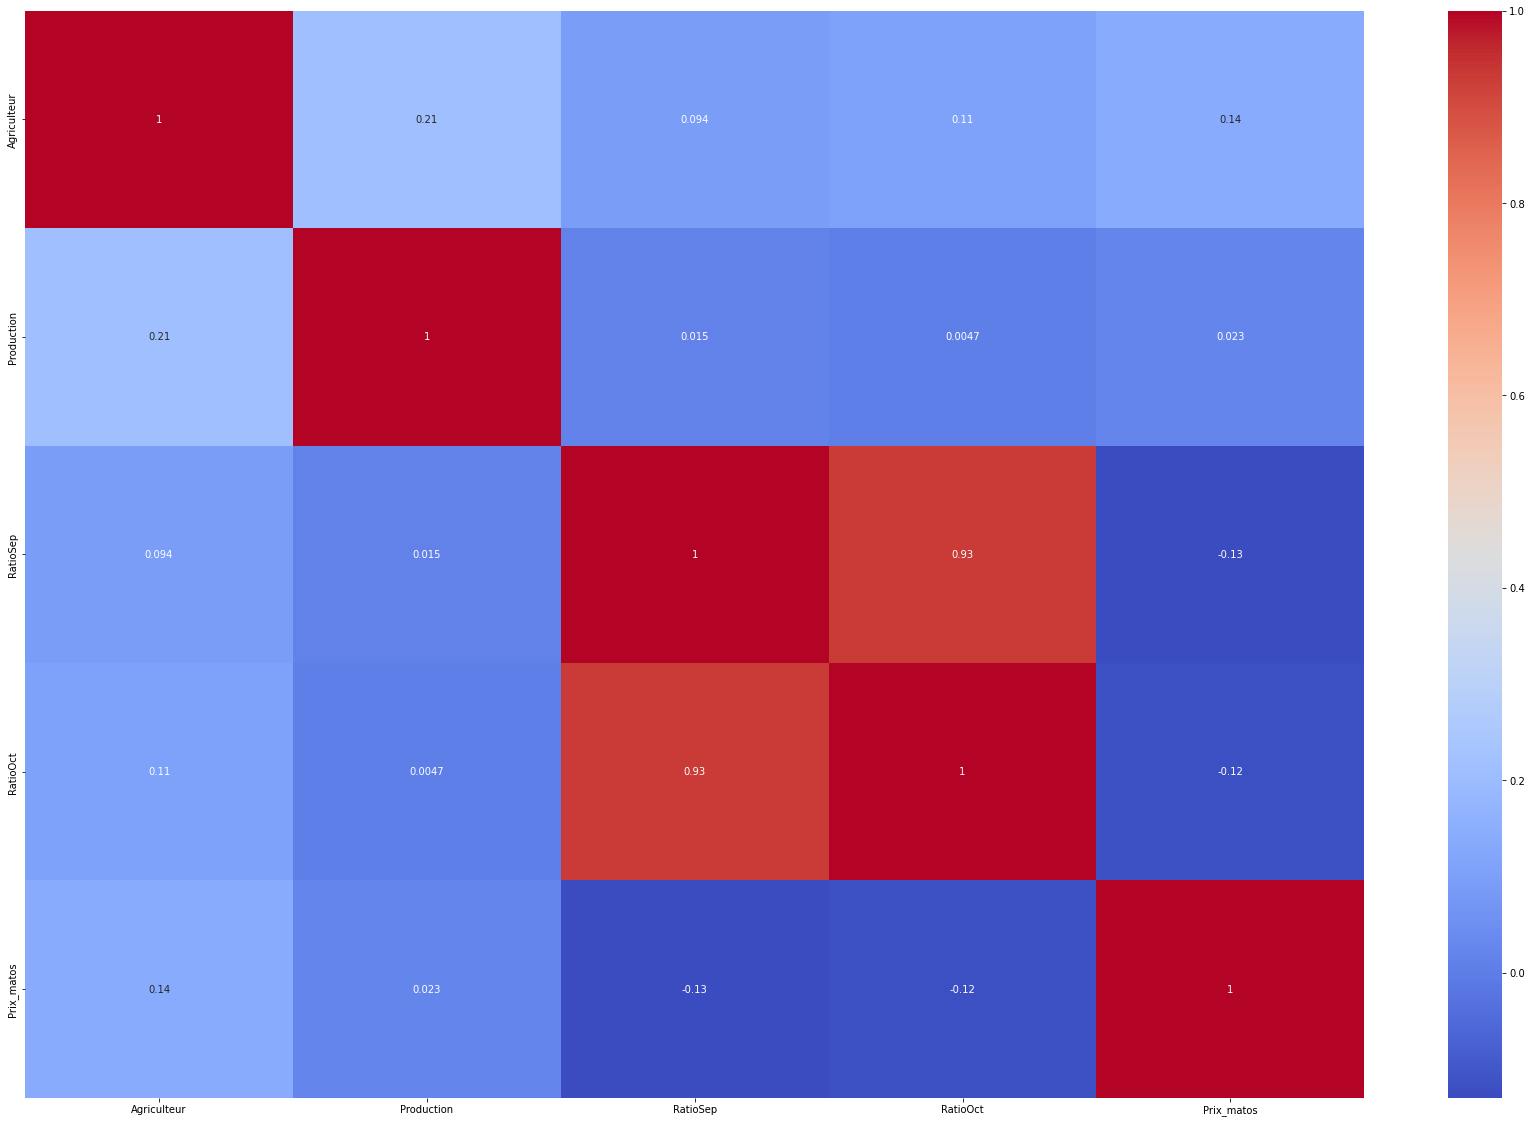

In [67]:
plt.figure(figsize = (30,20))
cols=['Agriculteur','Production','RatioSep','RatioOct','Prix_matos','Surface_n-1']
sns.heatmap(df[cols].corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10})

In [12]:
!pip install xgboost

In [10]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config; set_config(display='diagram')
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate

xgb=XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

scaler=RobustScaler()
pipe=Pipeline([
         ('Scaler',scaler),
         ('XGBoost',xgb)
])

/Users/constantintalandier/.pyenv/versions/3.8.12/envs/deepagri/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [13]:
X_test=df.iloc[-93:].drop(columns=['Production'])
#X_test=df.iloc[-93:][['Surface_n-1','Agriculteur','windspeed_max sept-jan_n-1']]
y_test=df.iloc[-93:]['Production']
X_train=df.iloc[:-93].drop(columns=['Production'])
#X_train=df.iloc[:-93][['Surface_n-1','Agriculteur','']]
y_train=df.iloc[:-93]['Production']

In [14]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Scaler', RobustScaler()),
                ('XGBoost',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.1,
                              max_delta_step=0, max_depth=10,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=10, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [15]:
y_pred=pipe.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [17]:
mean_absolute_percentage_error(y_test,y_pred)

24.74900589645665

In [18]:
y_pred.sum()

42264396.0

In [19]:
y_test.sum()

35409386.8

In [97]:
X=df.drop(columns=['Production','date jan-mar','date sept-jan_n-1'])
y=df['Production']
import pandas as pd
from sklearn.inspection import permutation_importance
pipe.fit(X,y)
permutation_score = permutation_importance(pipe, X, y, n_repeats=10)
importance_df = pd.DataFrame(np.vstack((X.columns,permutation_score.importances_mean)).T) # Unstack results from permutation_score

importance_df.columns=['feature','score decrease']
importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
4,Surface_n-1,0.665657
0,Agriculteur,0.277061
10,windspeed_max sept-jan_n-1,0.12188
25,sunhour jan-mar,0.084536
11,rain_mm jan-mar,0.071363
9,windspeed_max jan-mar,0.061193
16,pressuremax_mb sept-jan_n-1,0.046844
22,snow_mm sept-jan_n-1,0.042867
12,rain_mm sept-jan_n-1,0.032176
13,humidity_pct jan-mar,0.030734


In [22]:
!pip install statsmodels

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
df_corr=df.corr()
df_ = pd.DataFrame()

df_["features"] = df_corr.index

for i in range(df_corr.shape[0]):
    df_.loc[i,"vif_index"] = vif(data_no_na_price[df_corr.index].values, i)

round(df_.sort_values(by="vif_index", ascending = False),2)

NameError: name 'data_no_na_price' is not defined

In [24]:
from deepagri.meteo_agg import agg_meteo

In [25]:
df_meteo=agg_meteo(agg_type='W')

In [42]:
from deepagri.data_rendement import get_data_rendement

In [43]:
df_surface=get_data_rendement()

/Users/constantintalandier/.pyenv/versions/3.8.12/envs/deepagri/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [44]:
df_surface

,Surface
Ind,
2010-1,33300.0
2010-2,177466.0
2010-3,47300.0
2010-4,1889.0
2010-5,2379.0
...,...
2022-90,2940.0
2022-91,28380.0
2022-93,320.0


In [31]:
annees=[]
annee=[]

for i in df_surface.index:
    print(i,end=' ')
    annee.append(i)
    if '95' in i:
        print('')
        annees.append(annee)
        annee=[]
    

2010-1 2010-2 2010-3 2010-4 2010-5 2010-6 2010-7 2010-8 2010-9 2010-10 2010-11 2010-12 2010-13 2010-14 2010-15 2010-16 2010-17 2010-18 2010-19 2010-20 2010-21 2010-22 2010-23 2010-24 2010-25 2010-26 2010-27 2010-28 2010-29 2010-30 2010-31 2010-32 2010-33 2010-34 2010-35 2010-36 2010-37 2010-38 2010-39 2010-40 2010-41 2010-42 2010-43 2010-44 2010-45 2010-46 2010-47 2010-48 2010-49 2010-50 2010-51 2010-52 2010-53 2010-54 2010-55 2010-56 2010-57 2010-58 2010-59 2010-60 2010-61 2010-62 2010-63 2010-64 2010-65 2010-66 2010-67 2010-68 2010-69 2010-70 2010-71 2010-72 2010-73 2010-74 2010-76 2010-77 2010-78 2010-79 2010-80 2010-81 2010-82 2010-83 2010-84 2010-85 2010-86 2010-87 2010-88 2010-89 2010-90 2010-91 2010-93 2010-94 2010-95 
2010-96 2011-1 2011-2 2011-3 2011-4 2011-5 2011-6 2011-7 2011-8 2011-9 2011-10 2011-11 2011-12 2011-13 2011-14 2011-15 2011-16 2011-17 2011-18 2011-19 2011-20 2011-21 2011-22 2011-23 2011-24 2011-25 2011-26 2011-27 2011-28 2011-29 2011-30 2011-31 2011-32 2011-33 2

In [32]:
print(len(annees))
for index,i in enumerate(annees):
    print(len(annees[index+1])==len(i))

13
False
True
True
True
True
True
True
True
True
True
True
True


IndexError: list index out of range